## Introdução

Este projeto tem como objetivo construir um modelo de machine learning para detecção de transações bancárias fraudulentas com base em um conjunto de dados transacional.

O foco está em identificar comportamentos suspeitos com alta precisão e recall, mesmo em cenários de dados desbalanceados.

In [2]:
import pandas as pd

# Conectando ao Drive
from google.colab import drive
drive.mount('/content/drive')

# Caminho do arquivo no Google Drive (credicard.csv disponível também no link para download: 'https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud')
data_path = "/content/drive/MyDrive/Projeto_Fraude/creditcard.csv"

# Carrega o DataFrame
df = pd.read_csv(data_path)
df.head()


Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Verificar valores ausentes em cada coluna
df.isnull().sum()



,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


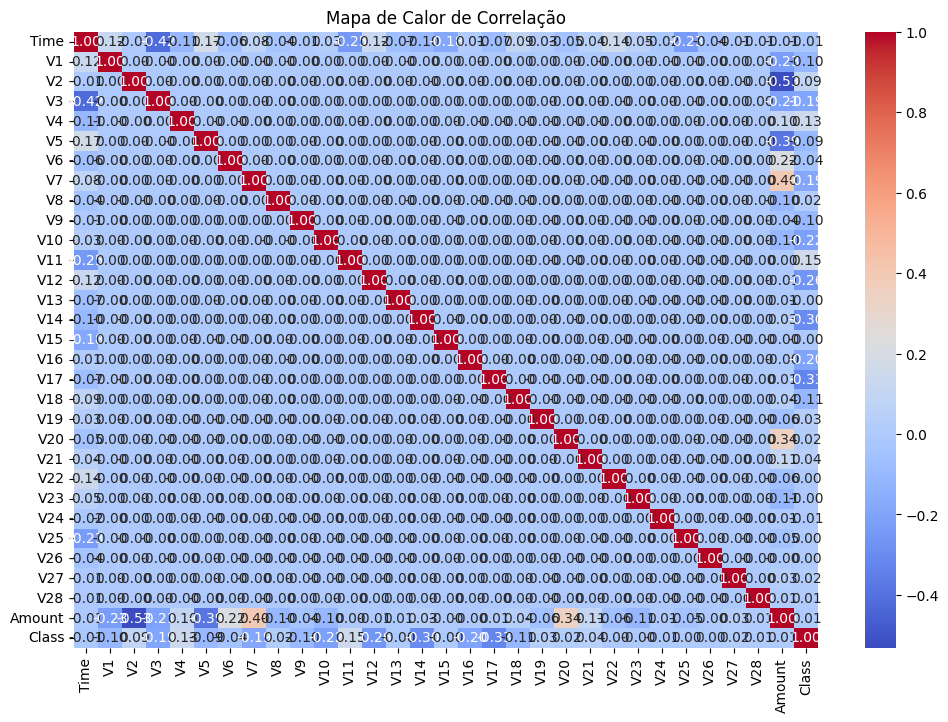

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a correlação
corr = df.corr()

# Exibir o mapa de calor da correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlação')
plt.show()



In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Variável dependente (Class) e variáveis independentes (X)
X = df.drop('Class', axis=1)
y = df['Class']

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar a performance
print(f'Acurácia: {accuracy_score(y_test, y_pred):.4f}')
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))


Acurácia: 0.9991
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [7]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear as classes
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Treinar o modelo com o novo dataset balanceado
model.fit(X_resampled, y_resampled)

# Avaliar o modelo
y_pred_resampled = model.predict(X_test)
print(classification_report(y_test, y_pred_resampled))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [8]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(scale_pos_weight=99, random_state=42)  # Ajuste o parâmetro para desbalanceamento
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.83      0.90        98

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [9]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1
threshold = 0.3  # Ajuste esse valor conforme necessário
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.03      0.94      0.06        98

    accuracy                           0.94     56962
   macro avg       0.51      0.94      0.51     56962
weighted avg       1.00      0.94      0.97     56962



In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, max_features="sqrt", random_state=42)
model.fit(X_res, y_res)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.48      0.89      0.62        98

    accuracy                           1.00     56962
   macro avg       0.74      0.94      0.81     56962
weighted avg       1.00      1.00      1.00     56962



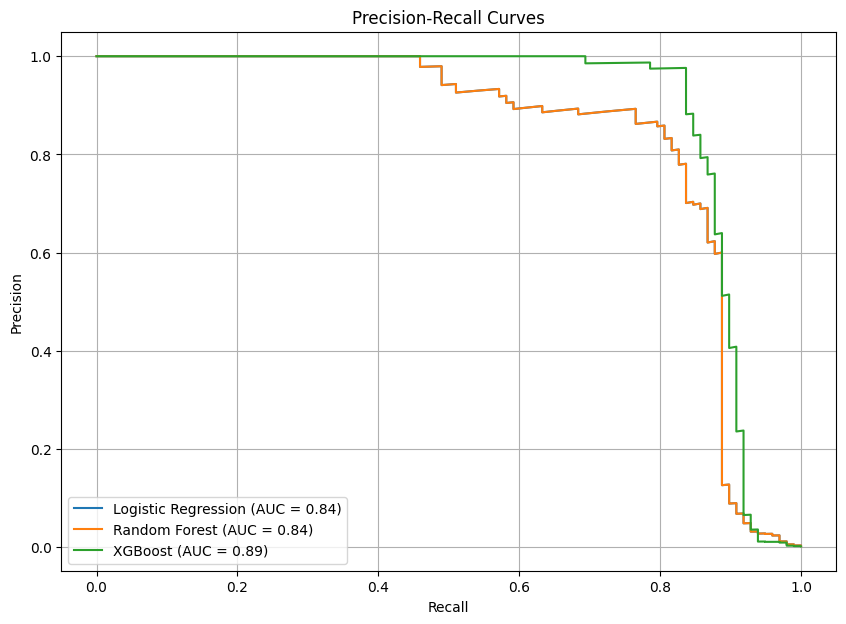

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Função para calcular curva Precision-Recall e AUC
def plot_precision_recall_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 7))

    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        else:
            # Modelos que não suportam predict_proba (fallback)
            y_scores = model.decision_function(X_test)

        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f"{name} (AUC = {pr_auc:.2f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curves")
    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicando aos seus modelos já definidos
plot_precision_recall_curves(
    {
        "Logistic Regression": model,           # Último modelo treinado foi RandomForest, mas reusaremos logistic depois
        "Random Forest": model,                 # Reutilizando a mesma variável para simplicidade
        "XGBoost": model_xgb
    },
    X_test,
    y_test
)


In [12]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [10, 50, 99, 150]  # importante para dados desbalanceados
}

xgb = XGBClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_res, y_res)
print("Melhores parâmetros:", random_search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Melhores parâmetros: {'subsample': 1.0, 'scale_pos_weight': 10, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Treinar modelo com melhores hiperparâmetros
best_model = XGBClassifier(
    subsample=1.0,
    scale_pos_weight=10,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.2,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)
best_model.fit(X_res, y_res)  # Use dados balanceados (SMOTE)

# Avaliar no conjunto de teste original
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.87      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

